In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread
from PIL import Image

In [9]:
def hough(image, low=400, high=500, step=10, savefile="hough.png"):
    edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)
    hough_radii = np.arange(low, high, step)
    hough_res = hough_circle(edges, hough_radii)

    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    image = color.gray2rgb(image)
    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = circle_perimeter(center_y, center_x, radius)
        image[circy, circx] = (220, 20, 20)

    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()
    plt.imsave(savefile, image)

C:\Users\Joheen\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


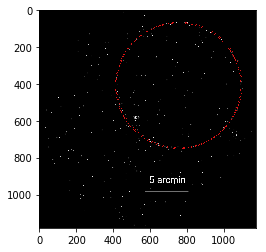

In [36]:
img = imread('sampleobs.png')
img.shape
imggray = color.rgb2gray(img)
# plt.imshow(imggray, cmap="gray")
# plt.show()
houghimg = img_as_ubyte(imggray)
hough(houghimg, low=300, high=900, step=10)

C:\Users\Joheen\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


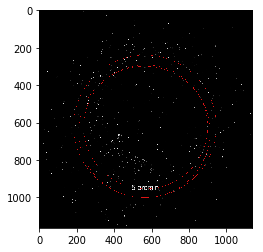

In [37]:
img = imread('sampleobs2.png')
img.shape
imggray = color.rgb2gray(img)
# plt.imshow(imggray, cmap="gray")
# plt.show()
houghimg = img_as_ubyte(imggray)
hough(houghimg, low=300, high=900, step=10, savefile="hough2.png")